### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data
data = pd.read_csv("framingham.csv")

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### EDA

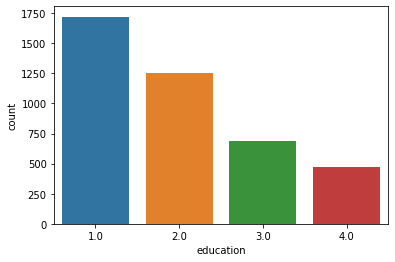

In [7]:
sns.countplot(x='education',data=data) 
# Most participants seem to have some form of high school education. 
#A fewer number of them have a diploma or went to college, and very few have a degree.

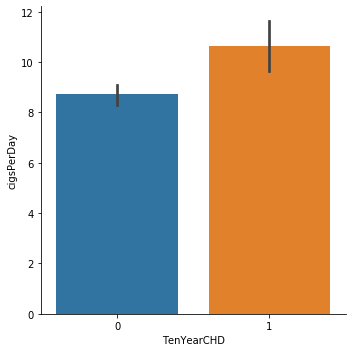

In [8]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=data)
#It can be seen that patients who have a ten year CHD risk smoke more cigarettes per day than those who do not.

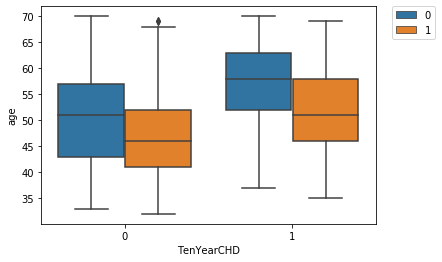

In [10]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# From here, it can be seen that older patients are more likely to develop CHD. 
# Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

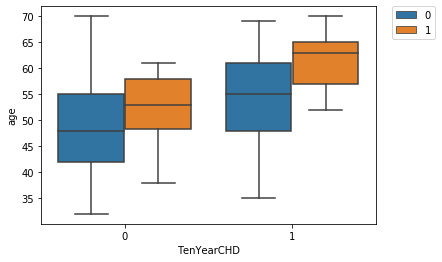

In [12]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# It looks as though strokes are more prevalent in participants of an older age group.

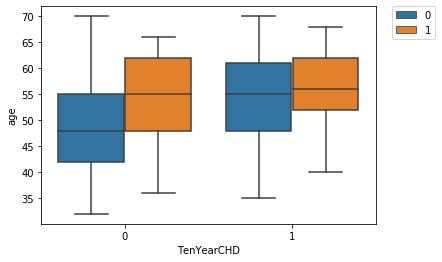

In [13]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Again, it looks as though an older participant is more likely to have diabetes than a younger one.

(80, 725.45)

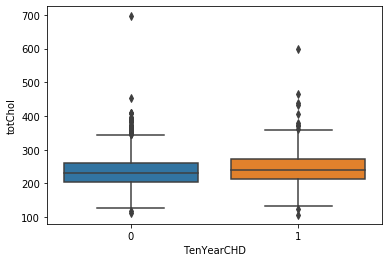

In [15]:
sns.boxplot(x='TenYearCHD',y='totChol',data=data)
plt.ylim(80)
# Patients with a ten year CHD risk have slightly higher cholesterol levels than patients who don’t, 
# though the difference is very small and not significant.

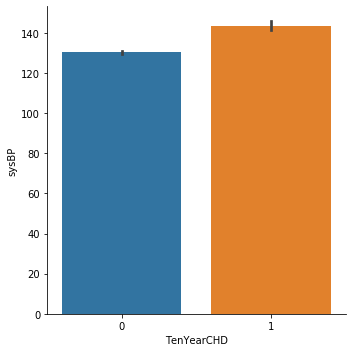

In [17]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=data)

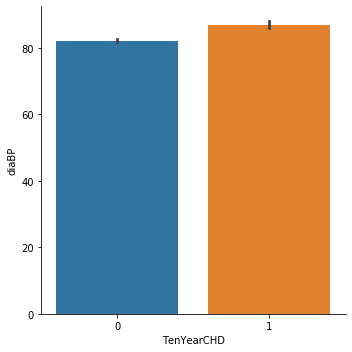

In [18]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=data)
# Patients with a ten year CHD risk seem to have higher blood pressure than the ones who don’t.

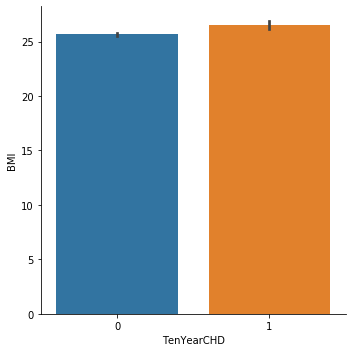

In [19]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=data)
# Patients with CHD are seen to have slightly higher BMI than patients without.

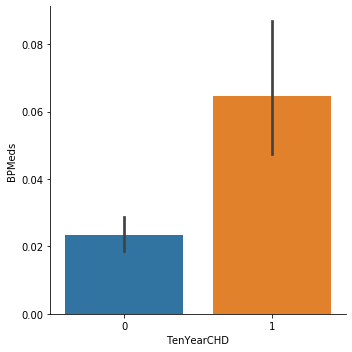

In [20]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=data)
# A higher dosage of BP medications is associated with a larger ten year CHD risk.

### Data Preprocessing

In [21]:
# Checking for null values
data.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [22]:
data = data.dropna()

In [23]:
data['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [25]:
# Baseline accuracy:
3101/(3101+557)
# The baseline accuracy is 0.85, and the model has to beat this baseline.

0.8477310005467469

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

### Over and under-sampling

In [60]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [49]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)

In [58]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [59]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

In [51]:
pipepred = pipeline.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))
# The model has high precision and recall for both outcomes, and has an accuracy of 0.90, which beats the baseline.

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1077
           1       0.84      0.98      0.90      1094

    accuracy                           0.89      2171
   macro avg       0.90      0.89      0.89      2171
weighted avg       0.90      0.89      0.89      2171



In [54]:
accuracy_score(y_test,pipepred)

0.8926761860893597

### Thank you